<a href="https://colab.research.google.com/github/shindeswatiii/data-science-/blob/main/real_time_news_collection_data_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install dotenv wordcloud

In [2]:
import requests
import pandas as pd
from datetime import datetime,timedelta
from dotenv import load_dotenv
import os


In [3]:
load_dotenv()
api_key = os.getenv('d89f7ec858b440d195fc31a531200900')

In [4]:
to_date = datetime.utcnow().date()
from_date = to_date - timedelta(days=2)

In [5]:
QUERY = 'India Pakistan war OR conflict OR border OR attack OR tension'
LANG = 'en'
PAGE_SIZE = 100


In [12]:
# fetch articles
# Define the fetch_news function
def fetch_news(query, from_date, to_date, api_key, lang='en', page_size=100):
    """Fetches news articles from a news API."""
    base_url = 'https://newsapi.org/v2/everything' # Replace with the actual API endpoint
    params = {
        'q': query,
        'from': from_date,
        'to': to_date,
        'language': lang,
        'pageSize': page_size,
        'apiKey': api_key  # Pass the API key here
    }
    try:
        response = requests.get(base_url, params=params)
        response.raise_for_status()  # Raise an exception for bad status codes
        data = response.json()
        return data.get('articles', [])
    except requests.exceptions.RequestException as e:
        print(f"Error fetching news: {e}")
        return []

# fetch articles
articles = fetch_news(QUERY, from_date.isoformat(), to_date.isoformat(), api_key='d89f7ec858b440d195fc31a531200900', lang=LANG, page_size=PAGE_SIZE) # Pass the api_key

# convert to dataframe
df = pd.DataFrame([{
    'title': article['title'],
    'description': article['description'],
    'source': article['source']['name'],
    'published_at': article['publishedAt'],
    'url': article['url'],
    'content': article['content']
} for article in articles])

# save to CSV
df.to_csv("india_pakistan_conflict_news.csv", index=False)
print(f"{len(df)} articles saved to 'india_pakistan_conflict_news.csv'")

96 articles saved to 'india_pakistan_conflict_news.csv'


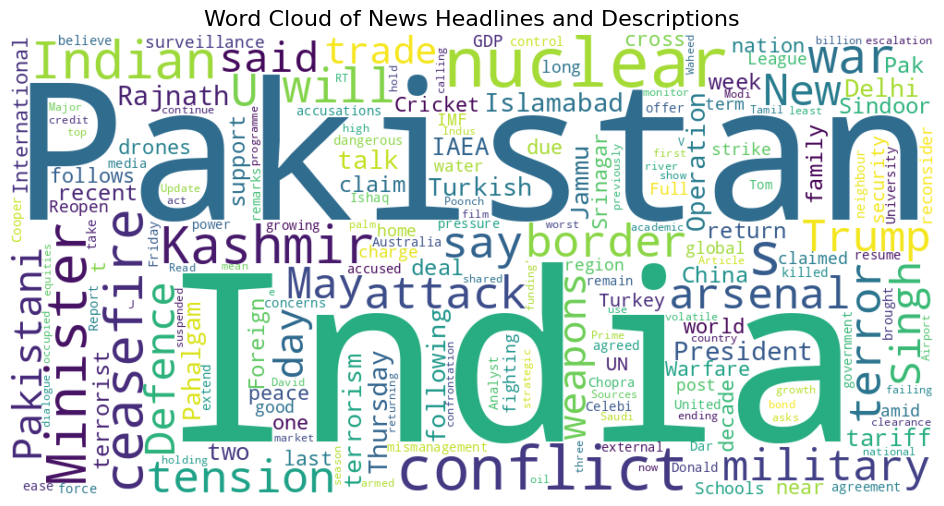

In [13]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# combine title and description text for word cloud
text_data = df['title'].fillna('') + ' ' + df['description'].fillna('')
combined_text = ' '.join(text_data.tolist())

# generate word cloud
wordcloud = WordCloud(width=1000, height=500, background_color='white', collocations=False).generate(combined_text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of News Headlines and Descriptions", fontsize=16)
plt.show()